In [31]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

In [32]:
# Combine the data into a single dataset
city_ride = pd.merge(ride, city, on="city")

# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

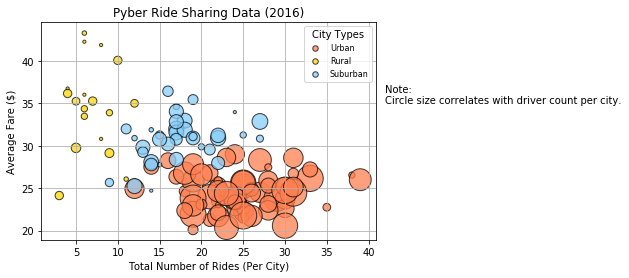

In [33]:
# Obtain the x and y coordinates for each of the three city types
Urban_df = city_ride[city_ride["type"] == "Urban"].groupby([city_ride["city"]])
Suburban_df = city_ride[city_ride["type"] == "Suburban"].groupby([city_ride["city"]])
Rural_df = city_ride[city_ride["type"] == "Rural"].groupby([city_ride["city"]])

#Urban
x_Urban = Urban_df["ride_id"].count()
y_Urban = Urban_df["fare"].mean()
s_Urban = Urban_df["driver_count"].mean()

#Suburban
x_Suburban = Suburban_df["ride_id"].count()
y_Suburban = Suburban_df["fare"].mean()
s_Suburban = Suburban_df["driver_count"].mean()

#Rural
x_Rural = Rural_df["ride_id"].count()
y_Rural = Rural_df["fare"].mean()
s_Rural = Rural_df["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_Urban, y_Urban, label = "Urban", s=s_Urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_Rural, y_Rural, label = "Rural", s=s_Rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_Suburban, y_Suburban, label = "Suburban", s=s_Suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/Pyber.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

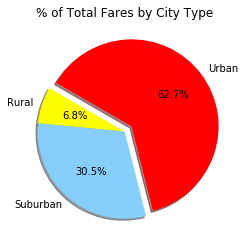

In [35]:
# % of Total Fares by City Type
# Calculate Type Percents
type_percent = city_ride.groupby(['type'])
total_fares = type_percent['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "red"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pyber2.png", bbox_inches="tight")

# Show Figure
plt.show()

## Total Rides by City Type

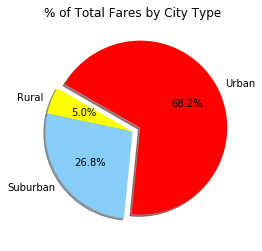

In [37]:
# % of Total Rides by City Type
# Calculate Type Percents
type_percent = city_ride.groupby(['type'])
total_fares = type_percent['ride_id'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "red"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pyber3.png", bbox_inches="tight")

# Show Figure
plt.show()

## Total Drivers by City Type

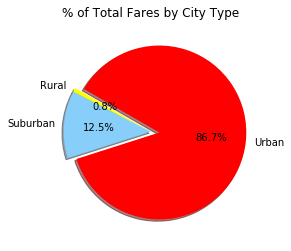

In [39]:
# % of Total Drivers by City Type
# Calculate Type Percents
type_percent = city_ride.groupby(['type'])
total_fares = type_percent['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "lightskyblue", "red"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pyber4.png", bbox_inches="tight")

# Show Figure
plt.show()